
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Deep Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Assignment 3 Practical Question 1 <br>
<font color=696880 size=4>
<!-- <br> -->


____

<font color=2565AE size=6>
Parsa Hatami <br>
<font color=2565AE size=6>
400100962 <br>

____

100%|██████████| 170498071/170498071 [00:08<00:00, 21003602.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


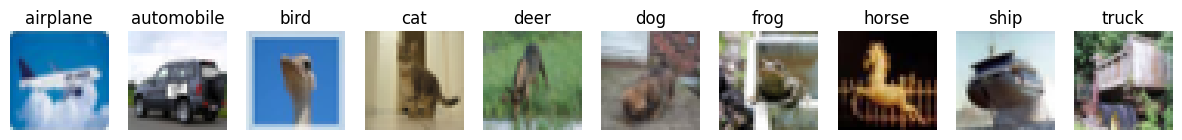

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = train_dataset.dataset.classes

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    class_indices = [idx for idx, label in enumerate(train_dataset) if label[1] == i]
    random_idx = class_indices[0]
    image, label = train_dataset[random_idx]
    ax.imshow(image.permute(1, 2, 0).numpy() / 2 + 0.5)
    ax.set_title(classes[label])
    ax.axis('off')

plt.show()


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Train Loss: 1.4579, Train Accuracy: 48.67%, Val Loss: 1.2877, Val Accuracy: 54.70%
Epoch [2/30], Train Loss: 1.1698, Train Accuracy: 60.12%, Val Loss: 1.1777, Val Accuracy: 59.15%
Epoch [3/30], Train Loss: 1.0619, Train Accuracy: 63.70%, Val Loss: 1.1373, Val Accuracy: 61.37%
Epoch [4/30], Train Loss: 1.0026, Train Accuracy: 65.89%, Val Loss: 1.1381, Val Accuracy: 60.91%
Epoch [5/30], Train Loss: 0.9509, Train Accuracy: 67.86%, Val Loss: 1.1219, Val Accuracy: 61.97%
Epoch [6/30], Train Loss: 0.9075, Train Accuracy: 69.02%, Val Loss: 1.1845, Val Accuracy: 60.34%
Epoch [7/30], Train Loss: 0.8583, Train Accuracy: 70.90%, Val Loss: 1.1304, Val Accuracy: 62.11%
Epoch [8/30], Train Loss: 0.8323, Train Accuracy: 71.72%, Val Loss: 1.1499, Val Accuracy: 62.27%
Epoch [9/30], Train Loss: 0.8035, Train Accuracy: 72.87%, Val Loss: 1.2240, Val Accuracy: 61.16%
Epoch [10/30], Train Loss: 0.7748, Train Accuracy: 

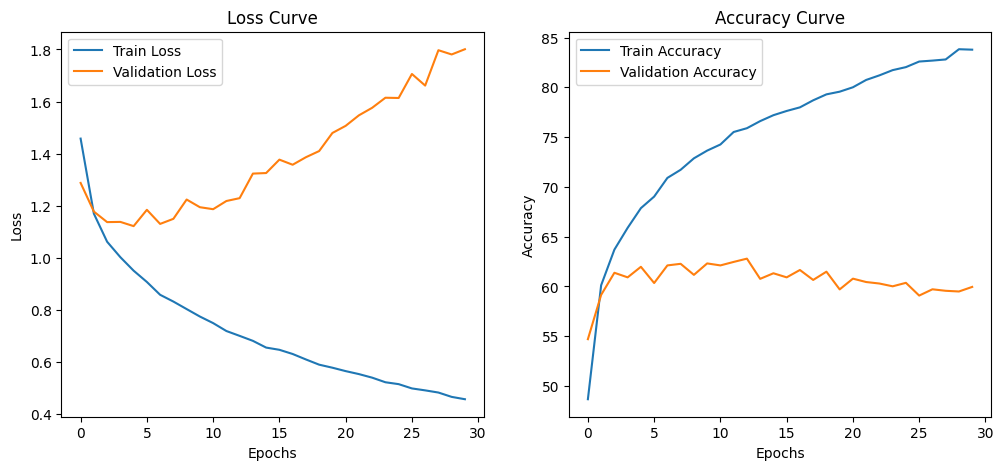

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

baseline_model = BaselineModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(baseline_model.parameters(), lr=0.01, momentum=0.9)

epochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    baseline_model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = baseline_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    baseline_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = baseline_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, "
        f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Save the best model
torch.save(baseline_model.state_dict(), 'baseline_model.pth')

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Train Loss: 1.5906, Train Accuracy: 40.34%, Val Loss: 1.2903, Val Accuracy: 52.12%
Epoch [2/30], Train Loss: 1.1099, Train Accuracy: 59.67%, Val Loss: 1.0120, Val Accuracy: 63.75%
Epoch [3/30], Train Loss: 0.8729, Train Accuracy: 69.01%, Val Loss: 0.9119, Val Accuracy: 68.52%
Epoch [4/30], Train Loss: 0.7049, Train Accuracy: 74.98%, Val Loss: 0.8576, Val Accuracy: 70.13%
Epoch [5/30], Train Loss: 0.5775, Train Accuracy: 79.69%, Val Loss: 0.8735, Val Accuracy: 70.89%
Epoch [6/30], Train Loss: 0.4645, Train Accuracy: 83.54%, Val Loss: 0.8458, Val Accuracy: 72.75%
Epoch [7/30], Train Loss: 0.3723, Train Accuracy: 86.97%, Val Loss: 0.9003, Val Accuracy: 72.72%
Epoch [8/30], Train Loss: 0.3005, Train Accuracy: 89.47%, Val Loss: 0.9712, Val Accuracy: 72.86%
Epoch [9/30], Train Loss: 0.2431, Train Accuracy: 91.37%, Val Loss: 1.0605, Val Accuracy: 73.45%
Epoch [10/30], Train Loss: 0.1927, Train Accuracy: 

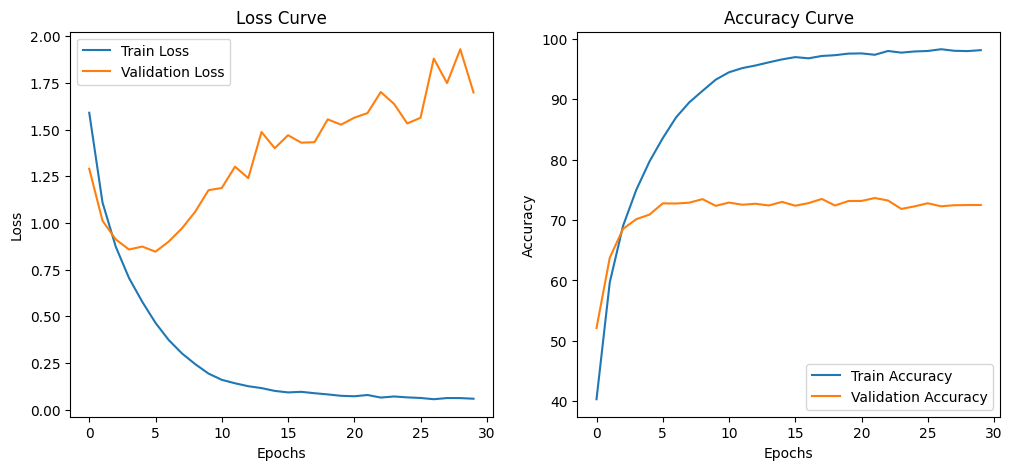

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class UpgradedModel(nn.Module):
    def __init__(self):
        super(UpgradedModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

upgraded_model = UpgradedModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(upgraded_model.parameters(), lr=0.001)

epochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    upgraded_model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = upgraded_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    upgraded_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = upgraded_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, "
        f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Save the best model
torch.save(upgraded_model.state_dict(), 'upgraded_model.pth')

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Train Loss: 1.2289, Train Accuracy: 54.90%, Val Loss: 0.9956, Val Accuracy: 64.02%
Epoch [2/30], Train Loss: 0.8410, Train Accuracy: 70.56%, Val Loss: 0.8405, Val Accuracy: 70.99%
Epoch [3/30], Train Loss: 0.6803, Train Accuracy: 76.22%, Val Loss: 0.8019, Val Accuracy: 72.42%
Epoch [4/30], Train Loss: 0.5641, Train Accuracy: 80.10%, Val Loss: 0.6976, Val Accuracy: 76.23%
Epoch [5/30], Train Loss: 0.4671, Train Accuracy: 83.68%, Val Loss: 0.7046, Val Accuracy: 76.29%
Epoch [6/30], Train Loss: 0.3900, Train Accuracy: 86.42%, Val Loss: 0.7875, Val Accuracy: 74.78%
Epoch [7/30], Train Loss: 0.3111, Train Accuracy: 89.19%, Val Loss: 0.7363, Val Accuracy: 77.46%
Epoch [8/30], Train Loss: 0.2562, Train Accuracy: 91.09%, Val Loss: 0.7807, Val Accuracy: 78.22%
Epoch [9/30], Train Loss: 0.2023, Train Accuracy: 92.90%, Val Loss: 0.7817, Val Accuracy: 78.29%
Epoch [10/30], Train Loss: 0.1658, Train Accuracy: 

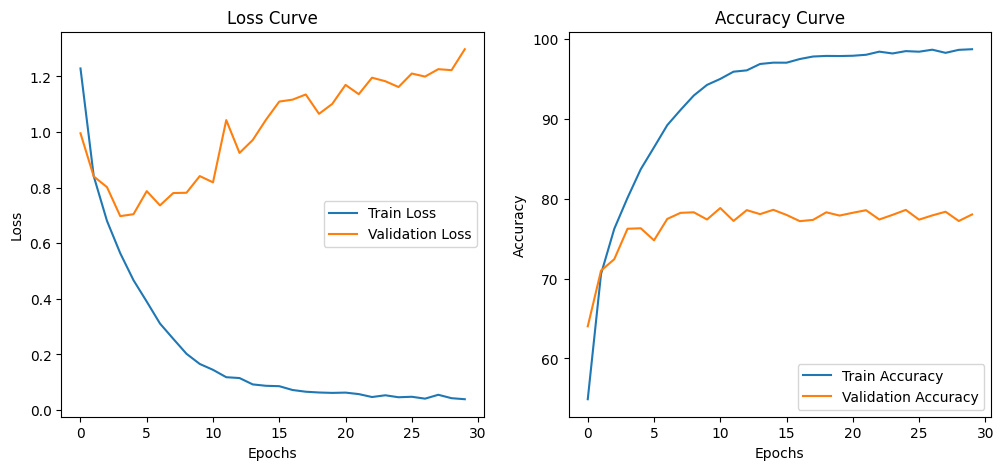

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class UpgradedModelWithBN(nn.Module):
    def __init__(self):
        super(UpgradedModelWithBN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_with_bn = UpgradedModelWithBN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_with_bn.parameters(), lr=0.001)

epochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model_with_bn.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model_with_bn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    model_with_bn.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model_with_bn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, "
        f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Save the best model
torch.save(model_with_bn.state_dict(), 'model_with_bn.pth')

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


#### **1. Baseline Model**
- **Training Accuracy**: 83.78%
- **Validation Accuracy**: Peaks at 62.79% around epoch 13 but later declines.
- **Training Loss**: Shows a consistent downward trend, indicating effective training.
- **Validation Loss**: Stabilizes initially but worsens after epoch 15, indicating overfitting.

**Analysis**:
The baseline model demonstrates the typical behavior of a simple neural network. Although it performs well on the training set, its validation performance stagnates around 62%, and it begins to overfit after around 15 epochs. This is likely due to the lack of additional regularization techniques such as batch normalization or dropout, and the architecture may not be complex enough to generalize well.

---

#### **2. Upgraded Model**
- **Training Accuracy**: 98.10%
- **Validation Accuracy**: Peaks at 73.63% around epoch 22.
- **Training Loss**: Quickly drops and stabilizes below 0.1, indicating efficient training.
- **Validation Loss**: Improves significantly compared to the baseline model but still shows some fluctuations due to overfitting.

**Analysis**:
The upgraded model improves significantly over the baseline, achieving a higher validation accuracy (up to 73.63%). This improvement is attributed to the deeper architecture with multiple convolutional layers, which can learn more complex features. However, the validation loss still fluctuates, indicating that the model might benefit from regularization techniques to reduce overfitting.

---

#### **3. Upgraded Model with Batch Normalization**
- **Training Accuracy**: 98.69%
- **Validation Accuracy**: Peaks at 78.82% around epoch 11.
- **Training Loss**: Shows consistent improvement and stabilizes efficiently.
- **Validation Loss**: Generally lower and more stable compared to the previous models.

**Analysis**:
Adding batch normalization significantly improves the model's performance and generalization. The validation accuracy peaks at 78.82%, which is the highest among the three models. Batch normalization reduces internal covariate shift and helps stabilize training by normalizing activations. It also acts as a form of regularization, which reduces overfitting.

---

1. **Overfitting**:
   - The baseline model shows significant overfitting as its validation accuracy stagnates early while training accuracy continues to rise.
   - Both the upgraded model and the batch-normalized model handle overfitting better, with batch normalization providing the most consistent improvements in validation performance.

2. **Validation Accuracy**:
   - Baseline Model: Peaks at ~62.79%.
   - Upgraded Model: Peaks at ~73.63%.
   - Upgraded Model with Batch Normalization: Peaks at ~78.82%.
   - Each architectural improvement shows a meaningful increase in validation accuracy, with batch normalization delivering the most robust results.

3. **Validation Loss**:
   - The baseline model has the least stable validation loss, worsening over time due to overfitting.
   - The upgraded model's validation loss improves but fluctuates after epoch 20.
   - The batch-normalized model maintains more stable and lower validation loss, further demonstrating its better generalization capabilities.

---

The results highlight the progressive improvement in model performance as architectural complexity and regularization techniques are introduced. The batch-normalized model demonstrates the best balance between training and validation performance, achieving a significant accuracy improvement (16% higher validation accuracy than the baseline model).


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Train Loss: 1.5837, Train Accuracy: 40.37%, Val Loss: 1.2803, Val Accuracy: 53.42%
Epoch [2/30], Train Loss: 1.2362, Train Accuracy: 55.33%, Val Loss: 1.0826, Val Accuracy: 61.22%
Epoch [3/30], Train Loss: 1.0873, Train Accuracy: 61.22%, Val Loss: 0.9710, Val Accuracy: 65.75%
Epoch [4/30], Train Loss: 0.9877, Train Accuracy: 65.25%, Val Loss: 0.9228, Val Accuracy: 67.47%
Epoch [5/30], Train Loss: 0.9194, Train Accuracy: 67.54%, Val Loss: 0.8469, Val Accuracy: 70.68%
Epoch [6/30], Train Loss: 0.8720, Train Accuracy: 69.50%, Val Loss: 0.8526, Val Accuracy: 70.09%
Epoch [7/30], Train Loss: 0.8308, Train Accuracy: 71.23%, Val Loss: 0.7430, Val Accuracy: 74.37%
Epoch [8/30], Train Loss: 0.7919, Train Accuracy: 72.72%, Val Loss: 0.7928, Val Accuracy: 72.24%
Epoch [9/30], Train Loss: 0.7646, Train Accuracy: 73.72%, Val Loss: 0.7523, Val Accuracy: 74.08%
Epoch [10/30], Train Loss: 0.7303, Train Accuracy: 

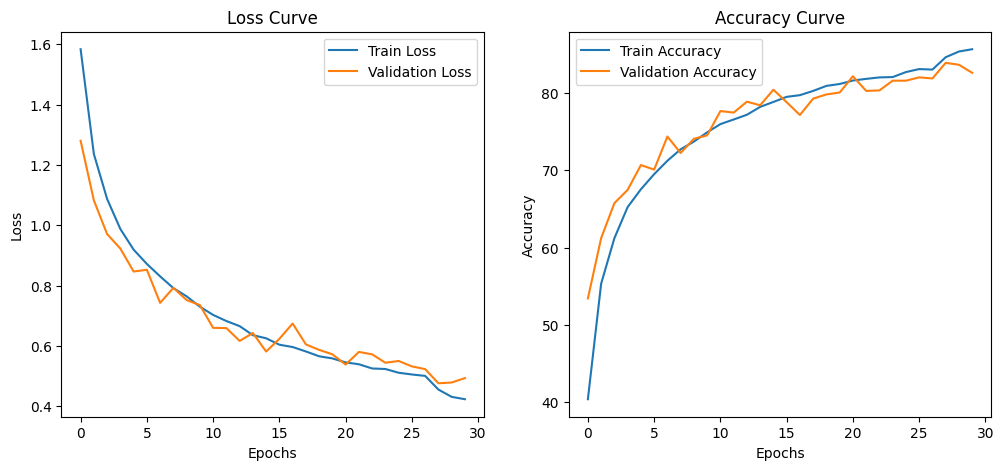

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class EnhancedModel(nn.Module):
    def __init__(self):
        super(EnhancedModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]))

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EnhancedModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

epochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    scheduler.step(val_accuracies[-1])

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, "
        f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Save the best model
torch.save(model.state_dict(), 'enhanced_model.pth')

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Train Loss: 1.6514, Train Accuracy: 37.65%, Val Loss: 1.3901, Val Accuracy: 49.01%
Epoch [2/30], Train Loss: 1.3182, Train Accuracy: 52.29%, Val Loss: 1.2463, Val Accuracy: 54.49%
Epoch [3/30], Train Loss: 1.1831, Train Accuracy: 58.65%, Val Loss: 1.2152, Val Accuracy: 58.92%
Epoch [4/30], Train Loss: 1.0861, Train Accuracy: 62.27%, Val Loss: 0.9737, Val Accuracy: 65.39%
Epoch [5/30], Train Loss: 1.0013, Train Accuracy: 65.50%, Val Loss: 0.8962, Val Accuracy: 68.86%
Epoch [6/30], Train Loss: 0.9442, Train Accuracy: 67.63%, Val Loss: 0.8061, Val Accuracy: 71.81%
Epoch [7/30], Train Loss: 0.8938, Train Accuracy: 69.79%, Val Loss: 0.8086, Val Accuracy: 72.51%
Epoch [8/30], Train Loss: 0.8563, Train Accuracy: 71.22%, Val Loss: 0.7297, Val Accuracy: 74.71%
Epoch [9/30], Train Loss: 0.8262, Train Accuracy: 72.36%, Val Loss: 0.7204, Val Accuracy: 75.50%
Epoch [10/30], Train Loss: 0.7931, Train Accuracy: 

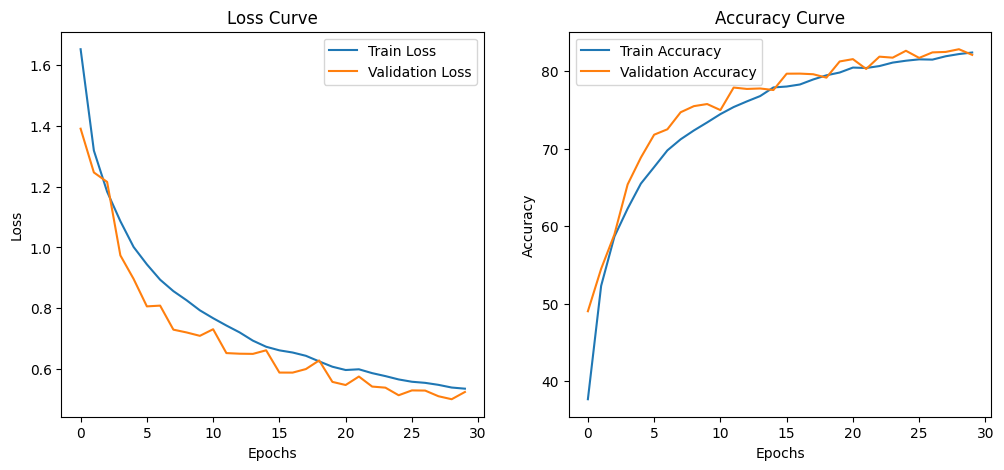

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class EnhancedModelWithMoreDropout(nn.Module):
    def __init__(self):
        super(EnhancedModelWithMoreDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]))

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EnhancedModelWithMoreDropout().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

epochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    scheduler.step(val_accuracies[-1])

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, "
        f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Save the best model
torch.save(model.state_dict(), 'enhanced_model_with_more_dropout.pth')

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


#### **1. Upgraded Model with Batch Normalization and Dropout**
- **Training Accuracy**: 85.67%
- **Validation Accuracy**: Peaks at 83.91% around epoch 28.
- **Training Loss**: Gradually decreases, showing effective training.
- **Validation Loss**: Improves steadily and stabilizes towards the end.

**Analysis**:
The model with batch normalization and dropout shows significant improvement over the baseline and upgraded models. Validation accuracy reaches 83.91%, indicating better generalization. Dropout helps prevent overfitting, while batch normalization stabilizes and accelerates training by normalizing activations. The combination of both techniques balances regularization and performance effectively.

---

#### **2. Upgraded Model with Batch Normalization and More Dropout**
- **Training Accuracy**: 82.42%
- **Validation Accuracy**: Peaks at 82.85% around epoch 29.
- **Training Loss**: Shows a steady decrease but slower than the model with less dropout.
- **Validation Loss**: Gradually improves, showing good generalization.

**Analysis**:
Introducing additional dropout further regularizes the model, slightly lowering the training accuracy but maintaining high validation accuracy. This setup is effective in preventing overfitting, as shown by the steady improvement in validation performance. The trade-off is slightly slower training convergence compared to the model with less dropout, but it achieves nearly comparable validation accuracy.

---

1. **Overfitting Prevention**:
   - The model with batch normalization and more dropout demonstrates better resistance to overfitting, as evidenced by the stable validation loss and accuracy.
   - Both models benefit significantly from the combination of batch normalization and dropout.

2. **Validation Accuracy**:
   - Upgraded Model with BN and Dropout: Peaks at 83.91%.
   - Upgraded Model with BN and More Dropout: Peaks at 82.85%.
   - Both models outperform the baseline and upgraded models significantly, with only a slight difference in their peak validation accuracies.

3. **Validation Loss**:
   - Both models show steady improvement in validation loss, with the model with more dropout achieving slightly lower loss at the cost of slower convergence.

---

Both models with batch normalization and dropout demonstrate significant performance improvements compared to the baseline and upgraded models. While the model with less dropout achieves slightly higher validation accuracy (83.91%), the model with more dropout provides better regularization and stability. These results highlight the effectiveness of combining batch normalization and dropout for improving generalization in deep learning models.


Files already downloaded and verified


/tmp/ipykernel_23/1211431781.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('enhanced_model_with_more_dropout.pth'))


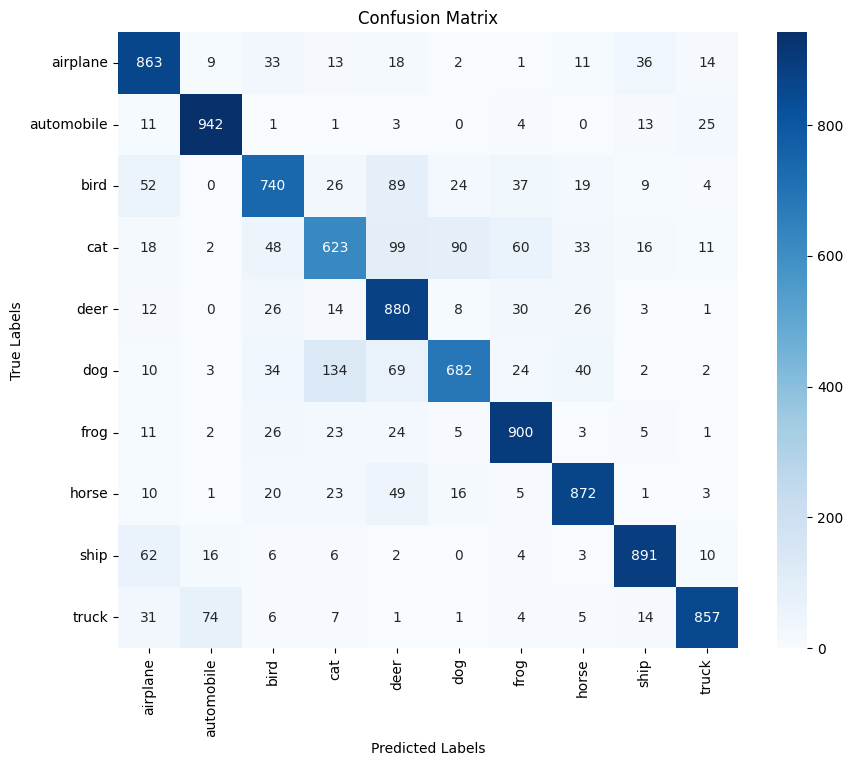

              precision    recall  f1-score   support

    airplane       0.80      0.86      0.83      1000
  automobile       0.90      0.94      0.92      1000
        bird       0.79      0.74      0.76      1000
         cat       0.72      0.62      0.67      1000
        deer       0.71      0.88      0.79      1000
         dog       0.82      0.68      0.75      1000
        frog       0.84      0.90      0.87      1000
       horse       0.86      0.87      0.87      1000
        ship       0.90      0.89      0.90      1000
       truck       0.92      0.86      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Overall Accuracy: 82.50%


In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reload the best model class
class EnhancedModelWithMoreDropout(nn.Module):
    def __init__(self):
        super(EnhancedModelWithMoreDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load the best model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EnhancedModelWithMoreDropout().to(device)
model.load_state_dict(torch.load('enhanced_model_with_more_dropout.pth'))
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred, target_names=test_dataset.classes)
print(report)

accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix) * 100
print(f'Overall Accuracy: {accuracy:.2f}%')


Files already downloaded and verified
Evaluating Baseline Model


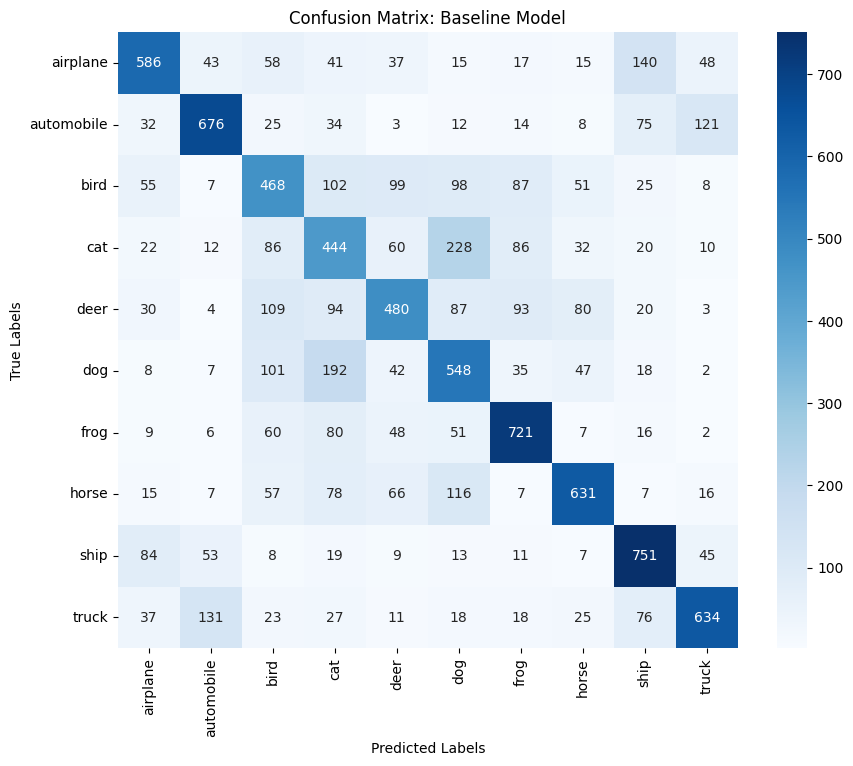

              precision    recall  f1-score   support

    airplane       0.67      0.59      0.62      1000
  automobile       0.71      0.68      0.69      1000
        bird       0.47      0.47      0.47      1000
         cat       0.40      0.44      0.42      1000
        deer       0.56      0.48      0.52      1000
         dog       0.46      0.55      0.50      1000
        frog       0.66      0.72      0.69      1000
       horse       0.70      0.63      0.66      1000
        ship       0.65      0.75      0.70      1000
       truck       0.71      0.63      0.67      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.60     10000
weighted avg       0.60      0.59      0.60     10000

Overall Accuracy for Baseline Model: 59.39%

Evaluating Improved Model


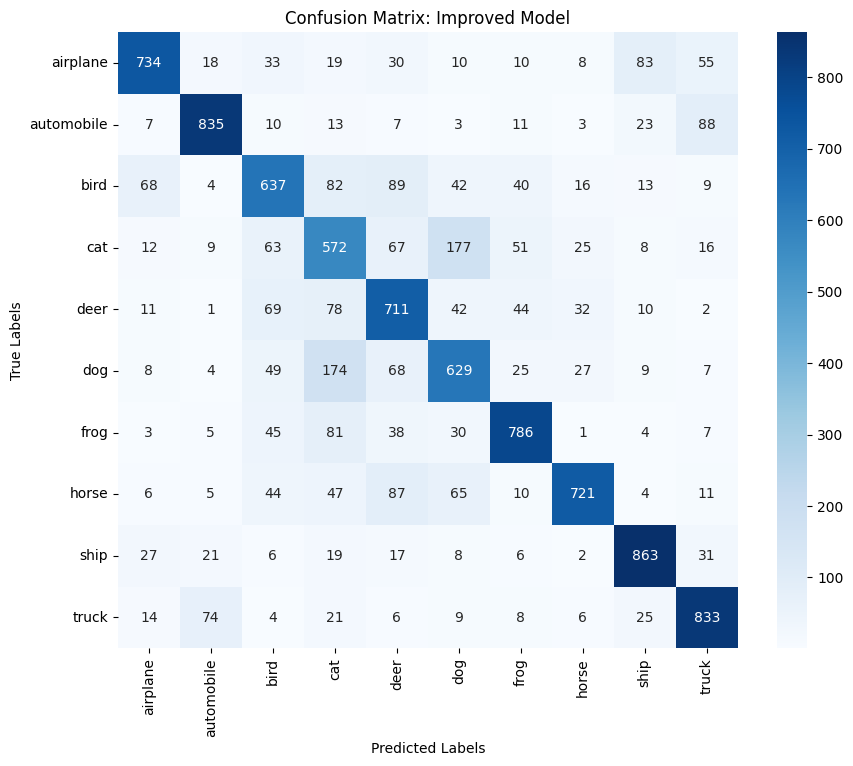

              precision    recall  f1-score   support

    airplane       0.82      0.73      0.78      1000
  automobile       0.86      0.83      0.85      1000
        bird       0.66      0.64      0.65      1000
         cat       0.52      0.57      0.54      1000
        deer       0.63      0.71      0.67      1000
         dog       0.62      0.63      0.62      1000
        frog       0.79      0.79      0.79      1000
       horse       0.86      0.72      0.78      1000
        ship       0.83      0.86      0.85      1000
       truck       0.79      0.83      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000

Overall Accuracy for Improved Model: 73.21%

Evaluating Model with BN


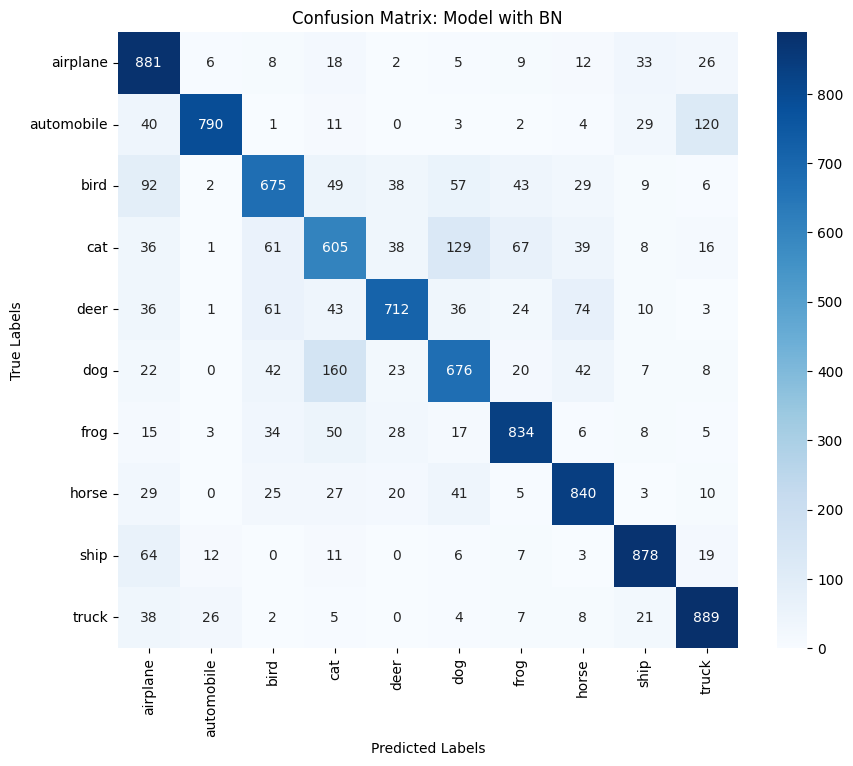

              precision    recall  f1-score   support

    airplane       0.70      0.88      0.78      1000
  automobile       0.94      0.79      0.86      1000
        bird       0.74      0.68      0.71      1000
         cat       0.62      0.60      0.61      1000
        deer       0.83      0.71      0.77      1000
         dog       0.69      0.68      0.68      1000
        frog       0.82      0.83      0.83      1000
       horse       0.79      0.84      0.82      1000
        ship       0.87      0.88      0.88      1000
       truck       0.81      0.89      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Overall Accuracy for Model with BN: 77.80%

Evaluating Model with BN and Dropout


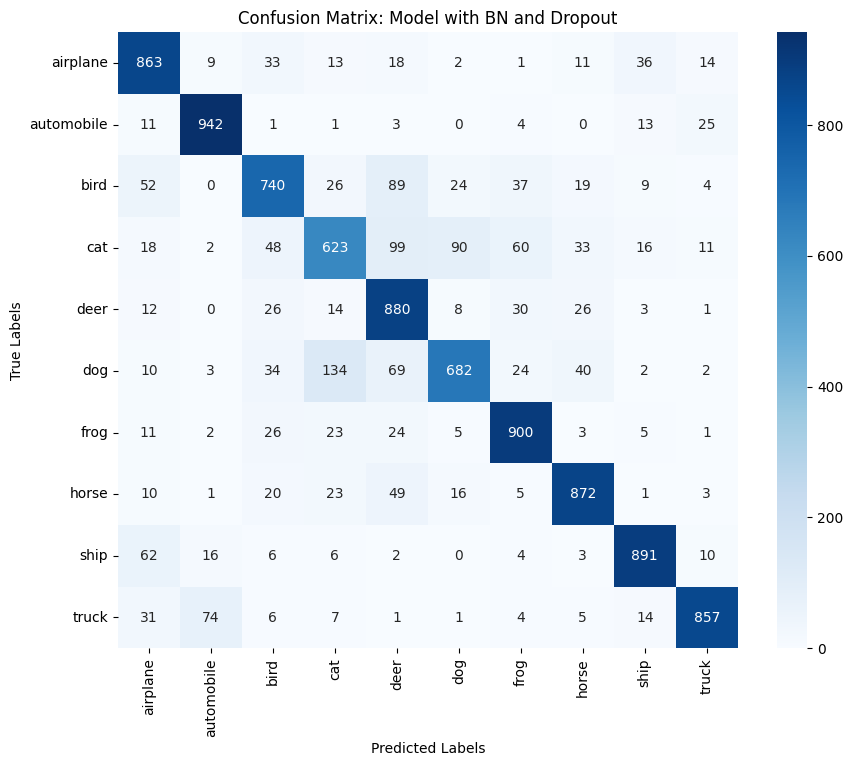

              precision    recall  f1-score   support

    airplane       0.80      0.86      0.83      1000
  automobile       0.90      0.94      0.92      1000
        bird       0.79      0.74      0.76      1000
         cat       0.72      0.62      0.67      1000
        deer       0.71      0.88      0.79      1000
         dog       0.82      0.68      0.75      1000
        frog       0.84      0.90      0.87      1000
       horse       0.86      0.87      0.87      1000
        ship       0.90      0.89      0.90      1000
       truck       0.92      0.86      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Overall Accuracy for Model with BN and Dropout: 82.50%



In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_plot_trained_model(model, test_loader, class_names, model_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix) * 100
    print(f'Overall Accuracy for {model_name}: {accuracy:.2f}%\n')
    return accuracy

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Evaluate all models
print("Evaluating Baseline Model")
baseline_accuracy = evaluate_and_plot_trained_model(baseline_model, test_loader, class_names, "Baseline Model")

print("Evaluating Improved Model")
improved_accuracy = evaluate_and_plot_trained_model(upgraded_model, test_loader, class_names, "Improved Model")

print("Evaluating Model with BN")
bn_accuracy = evaluate_and_plot_trained_model(model_with_bn, test_loader, class_names, "Model with BN")

print("Evaluating Model with BN and Dropout")
bn_dropout_accuracy = evaluate_and_plot_trained_model(model, test_loader, class_names, "Model with BN and Dropout")


#### **1. Baseline Model**
- **Overall Accuracy**: 59.39%
- **Precision/Recall Trends**:
  - Precision and recall are uniformly lower across all classes.
  - Performance is weakest for the **cat** (f1-score: 0.42) and **bird** (f1-score: 0.47) classes, showing significant difficulty in distinguishing these classes.
- **Observations**:
  - The baseline model suffers from both underfitting and low generalization capacity.
  - It struggles particularly with distinguishing similar classes like **dog** vs. **cat** and **automobile** vs. **truck**.

---

#### **2. Upgraded Baseline Model**
- **Overall Accuracy**: 73.21%
- **Precision/Recall Trends**:
  - **Airplane**, **automobile**, **ship**, and **truck** classes see significant improvement, with precision/recall exceeding 0.80.
  - Performance for **cat** (f1-score: 0.54) and **dog** (f1-score: 0.62) improves but remains relatively weaker.
- **Observations**:
  - The deeper architecture with multiple convolutional layers enables better feature extraction.
  - Significant improvement in separability across most classes, but confusion persists between visually similar classes like **cat** and **dog**.

---

#### **3. Upgraded Model with Batch Normalization**
- **Overall Accuracy**: 77.80%
- **Precision/Recall Trends**:
  - **Automobile**, **ship**, and **truck** achieve f1-scores above 0.85, demonstrating excellent separability.
  - Classes like **cat** (f1-score: 0.61) and **dog** (f1-score: 0.68) continue to underperform compared to others.
- **Observations**:
  - Batch normalization improves model generalization by stabilizing activations and improving convergence.
  - Overall confusion between similar classes decreases, but there’s still room for improvement in classes with higher intra-class variation.

---

#### **4. Upgraded Model with Batch Normalization and Dropout**
- **Overall Accuracy**: 82.50%
- **Precision/Recall Trends**:
  - Precision and recall are more uniformly distributed across classes.
  - Significant improvements for **cat** (f1-score: 0.67) and **dog** (f1-score: 0.75), which were previously weak points.
- **Observations**:
  - The combination of batch normalization and dropout reduces overfitting while maintaining high accuracy.
  - **Automobile** and **truck** classes benefit greatly from the additional regularization, achieving precision/recall near 0.90.

---

1. **Progressive Improvement**:
   - Accuracy improves consistently with model complexity and the addition of batch normalization and dropout:
     - Baseline: **59.39%**
     - Upgraded Baseline: **73.21%**
     - With Batch Normalization: **77.80%**
     - With Batch Normalization and Dropout: **82.50%**

2. **Impact of Regularization**:
   - Models with batch normalization show better generalization, as seen in the improved f1-scores and reduced overfitting.
   - Dropout further enhances generalization, particularly for challenging classes like **cat** and **dog**.

3. **Class-Specific Insights**:
   - **Cat** and **dog** consistently remain the most challenging classes due to their higher intra-class variability and similarity to other classes.
   - Classes like **automobile**, **ship**, and **truck** consistently perform well, likely due to their distinct features.

---

### **Confusion Matrix Insights**
1. **Baseline Model**:
   - High confusion between **cat** and **dog** (228 incorrect predictions for **cat** classified as **dog**).
   - **Truck** is often misclassified as **automobile**.

2. **Upgraded Model**:
   - Reduced confusion for **airplane**, **automobile**, and **truck**, leading to better f1-scores for these classes.
   - Still notable confusion between **cat** and **dog**.

3. **With Batch Normalization**:
   - Further reduced confusion for most classes, especially **frog** and **horse**.
   - **Cat** and **dog** remain problematic, but misclassifications are fewer.

4. **With Batch Normalization and Dropout**:
   - Misclassifications across all classes are minimized.
   - Strong improvements in separability for challenging classes like **cat**, **dog**, and **truck**.

---

- The progressive addition of architectural improvements—deeper layers, batch normalization, and dropout—significantly enhances performance.
- The model with **batch normalization and dropout** achieves the best balance between accuracy (82.50%) and generalization, as evidenced by uniformly high precision and recall across classes.
- Further improvements can focus on enhancing performance for difficult classes like **cat** and **dog**, possibly using advanced techniques like fine-grained feature learning or data augmentation.
